# Projeto Álgebra Linear Computacional

## Matrizes tridimensionais - Aplicação à Computação Gráfica

- Caio M. C. Ruas¹ - RM 24010
- Enzo J. Xavier¹ - RM 24035
- Pedro H. M. Bramante¹ - RM 24026
- Thalles J. S. Cansi¹ - Rm 24006

¹ ILUM - CNPEM - Escola de Ciência

### Importações e Definições

Importando as principais bibliotecas matemáticas e de plotagem de gráficos tridimensionais. Foram definidas funções didáticas para a compreensão de cada tipo de transformação

In [1]:
import numpy as np
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Retorna a matriz de translação para as distâncias x, y e z
def translacao(x, y, z):
    matriz = np.array([[1, 0, 0, x],
                       [0, 1, 0, y],
                       [0, 0, 1, z],
                       [0, 0, 0, 1]])
    return matriz


# Retorna a matriz de rotação no eixo x para um ângulo específico, em graus
def rotacao_x(angulo):
    angulo = np.radians(angulo)
    matriz = np.array([[1, 0, 0, 0],
                       [0, cos(angulo), -sin(angulo), 0],
                       [0, sin(angulo), cos(angulo), 0],
                       [0, 0, 0, 1]])
    return matriz


# Retorna a matriz de rotação no eixo y para um ângulo específico, em graus
def rotacao_y(angulo):
    angulo = np.radians(angulo)
    matriz = np.array([[cos(angulo), 0, sin(angulo), 0],
                       [0, 1, 0, 0],
                       [-sin(angulo), 0, cos(angulo), 0],
                       [0, 0, 0, 1]])
    return matriz


# Retorna a matriz de rotação no eixo z para um ângulo específico, em graus
def rotacao_z(angulo):
    angulo = np.radians(angulo)
    matriz = np.array([[cos(angulo), -sin(angulo), 0, 0],
                       [sin(angulo), cos(angulo), 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1]])
    return matriz

# Retorna a matriz de rotação no eixo z para um ângulo específico, em graus
def escala(x, y, z):
    matriz = np.array([[x, 0, 0, 0],
                       [0, y, 0, 0],
                       [0, 0, z, 0],
                       [0, 0, 0, 1]])
    return matriz

### Criação e Plotagem de Personagem

Foram definidos vértices e arestas que compõem o contorno de um personagem simples e didático. A função **plotar_boneco** cria um ambiente 3D e deixa os vértices coloridos de modo personalizado

In [2]:
# Vértices do boneco de palito
vertices = np.array([
    [0, 2, 0, 1],  # Cabeça (0)
    [0, 1, 0, 1],  # Pescoço (1)
    [-0.5, 0, 0, 1],  # Braço esquerdo (2)
    [0.5, 0, 0, 1],  # Braço direito (3)
    [0, -1, 0, 1],  # Quadril (4)
    [-0.5, -2, 0, 1],  # Perna esquerda (5)
    [0.5, -2, 0, 1]  # Perna direita (6)
])

# Arestas do boneco de palito
arestas = [
    [0, 1],  # Cabeça - Pescoço
    [1, 2],  # Pescoço - Braço esquerdo
    [1, 3],  # Pescoço - Braço direito
    [1, 4],  # Pescoço - Quadril
    [4, 5],  # Quadril - Perna esquerda
    [4, 6]   # Quadril - Perna direita
]

# Cores para cada aresta (modificado)
cores = ['k', 'k', 'k', 'g', 'b', 'b'] 

# Função para plotar o boneco
def plotar_boneco(ax, vertices, arestas, cores, titulo):
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 10])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(titulo)

    # Plota as arestas do boneco com cores
    for i, aresta in enumerate(arestas):
        ax.plot(vertices[aresta, 0], vertices[aresta, 1], vertices[aresta, 2], f'{cores[i]}-')

### Gráficos das Transformações

Criou-se um gráfico conjunto para cada tipo de transformação, comparando a imagem original e a modificada

#### Rotação

Escolheu-se um ângulo de 90º para uma rotação em torno do eixo z. Definimos a matriz, aplicamos ao vértice e plotamos o player num espaço

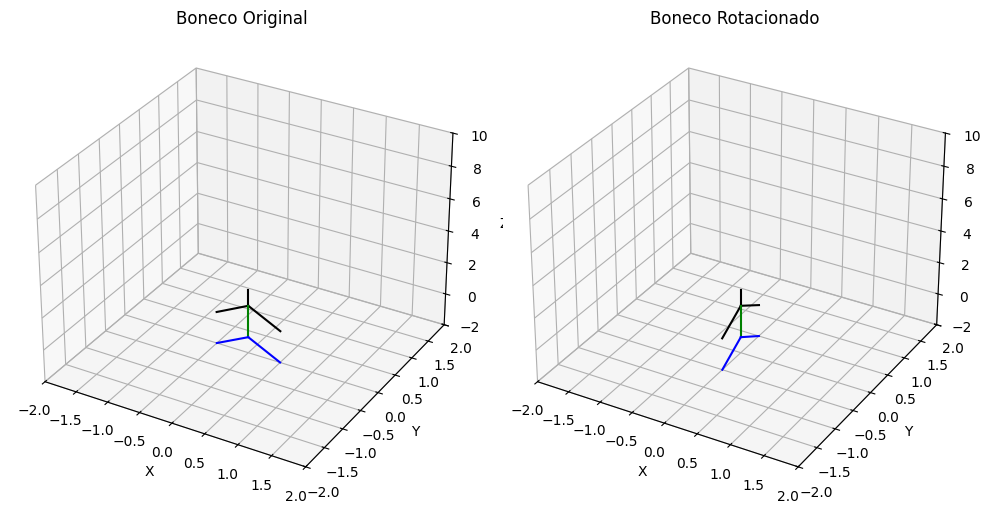

In [3]:
# Aplica a rotação inicial para deixar o boneco em pé
angulo = 90 
matriz_rot = rotacao_x(angulo)

# Aplica a escala (transpõe, multiplica e transpõe de volta)
vertices_rot = np.dot(matriz_rot, vertices.T).T  # Corrigido: transpõe de volta

# Cria a figura e os eixos 3D
fig1 = plt.figure(figsize=(10, 5))

# Plota o boneco original
ax1 = fig1.add_subplot(121, projection='3d')
plotar_boneco(ax1, vertices_rot, arestas, cores, 'Boneco Original')

# Aplica a rotação em torno do eixo Z
angulo_rotacao = 90
matriz_rotacao = rotacao_z(angulo_rotacao)
vertices_rotacionados = vertices_rot @ matriz_rotacao.T 


# Plota o boneco rotacionado
ax2 = fig1.add_subplot(122, projection='3d')
plotar_boneco(ax2, vertices_rotacionados, arestas, cores, 'Boneco Rotacionado')

plt.tight_layout()
plt.show()

#### Translação

Usou-se a matriz de translação definida anteriormente, aumentando em 5 todos os pontos do jogador no eixo z. Foi preciso transpor os vértices para o cálculo ocorrer corretamente, além da presença de coordenadas homogêneas

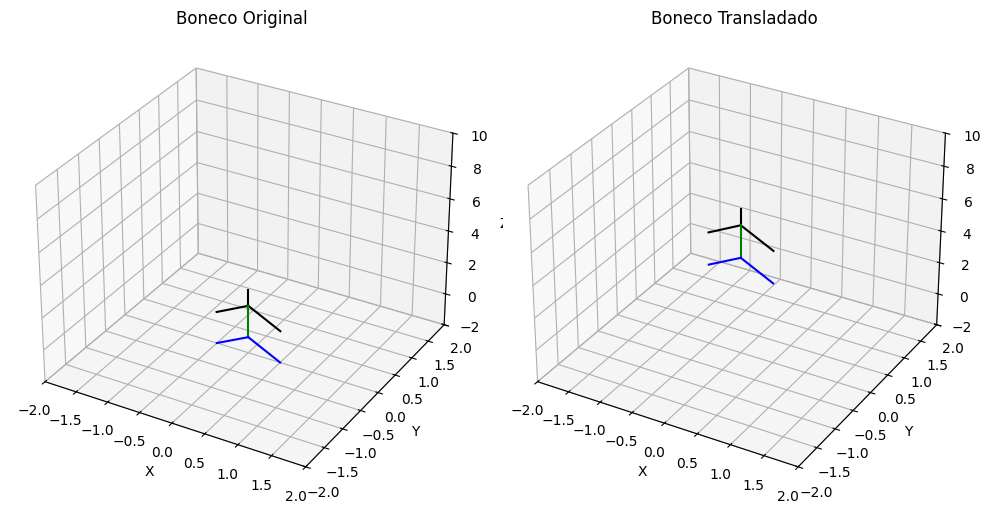

In [4]:
fig2 = plt.figure(figsize=(10, 5))
ax1 = fig2.add_subplot(121, projection='3d')
plotar_boneco(ax1, vertices_rot, arestas, cores, 'Boneco Original')

# Aplica a translação 
matriz_translacao = translacao(0,0,5)

vertices_transladados = np.dot(matriz_translacao, vertices_rot.T).T

# Plota o boneco translação
ax2 = fig2.add_subplot(122, projection='3d')
plotar_boneco(ax2, vertices_transladados, arestas, cores, 'Boneco Transladado')

plt.tight_layout()
plt.show()

#### Escala

Conforme códigos anteriores, criou-se 2 eixos dentro de uma figura. Aplicou-se a matriz e plotou-se o boneco escalado

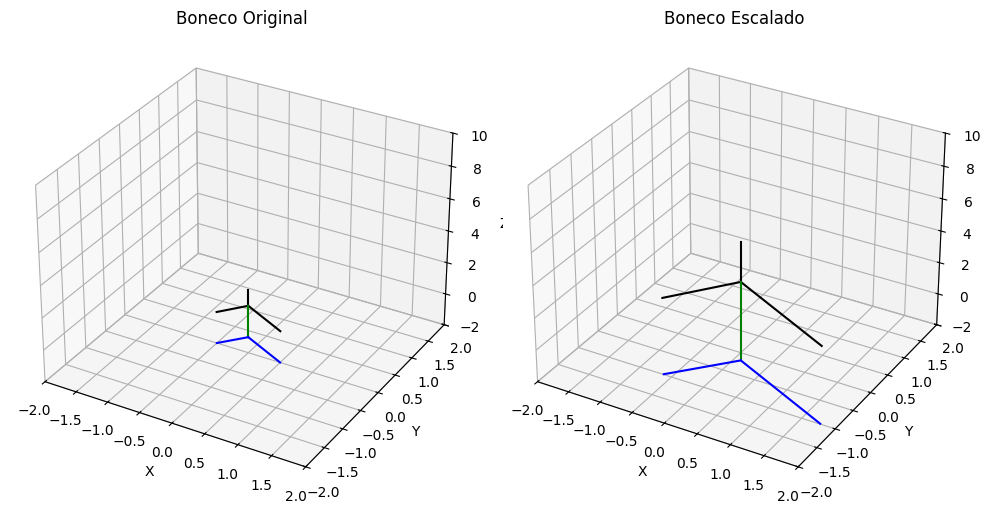

In [5]:
fig3 = plt.figure(figsize=(10, 5))
ax1 = fig3.add_subplot(121, projection='3d')
plotar_boneco(ax1, vertices_rot, arestas, cores, 'Boneco Original')

# Aplica a escala 
matriz_escala = escala(2.5,2.5,2.5)

vertices_escalados = np.dot(matriz_escala, vertices_rot.T).T

# Plota o boneco escalado
ax2 = fig3.add_subplot(122, projection='3d')
plotar_boneco(ax2, vertices_escalados, arestas, cores, 'Boneco Escalado')

plt.tight_layout()
plt.show()